 # import modules

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc,roc_auc_score


# Loading the dataset

In [2]:
df=pd.read_csv('C:/Users/om/Desktop/Capstone project/loan prediction analysis.csv')

In [3]:
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Preprocessing the data

In [7]:
# find the null values 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Figure size 1000x600 with 0 Axes>

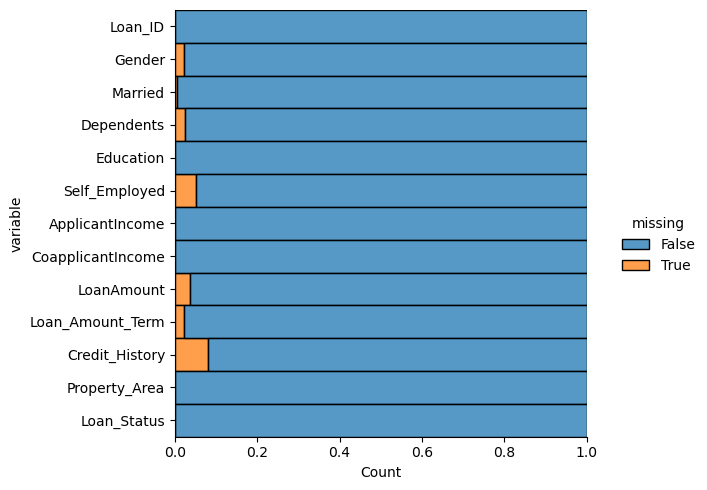

In [8]:
# Visualizing missing values.
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

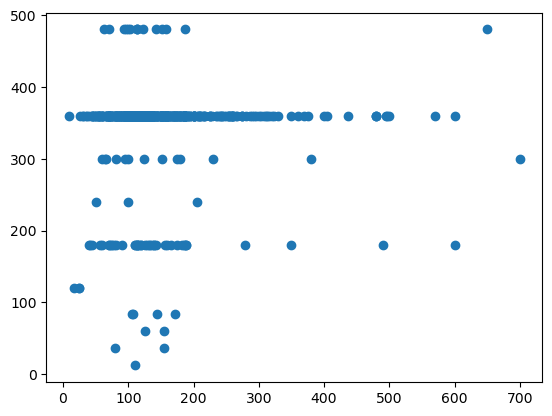

In [9]:
# Relationship between loanAmount and Loan_Amount_Term
import matplotlib.pyplot as plt

plt.scatter(df.LoanAmount,df.Loan_Amount_Term)
plt.show()

In [178]:
corrcoef = np.corrcoef(df.LoanAmount, df.Loan_Amount_Term)

print(corrcoef)


[[1.         0.03880147]
 [0.03880147 1.        ]]


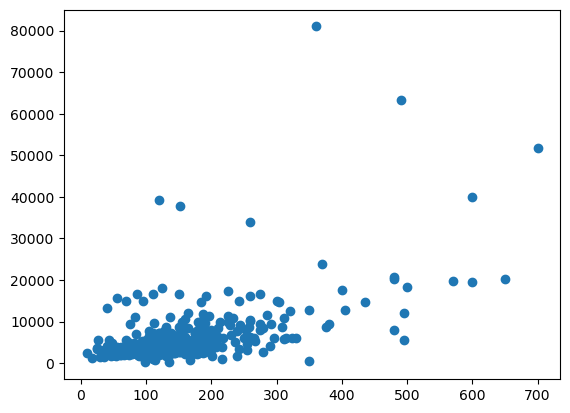

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df.LoanAmount,df.ApplicantIncome)
plt.show()

In [177]:
corrcoef = np.corrcoef(df.ApplicantIncome, df.Loan_Amount_Term)

print(corrcoef)

[[ 1.         -0.04524182]
 [-0.04524182  1.        ]]


In [13]:
# fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [14]:
# fill the missing values for categorical terms - mode
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

<Figure size 1000x600 with 0 Axes>

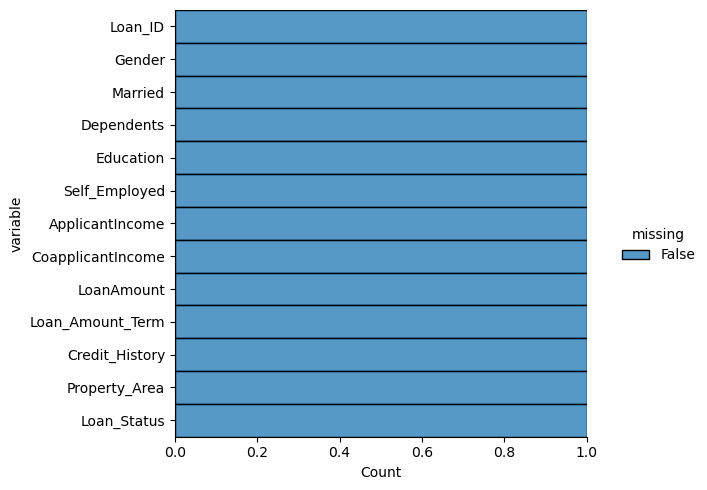

In [15]:
# After handling Missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [16]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory data analysis

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

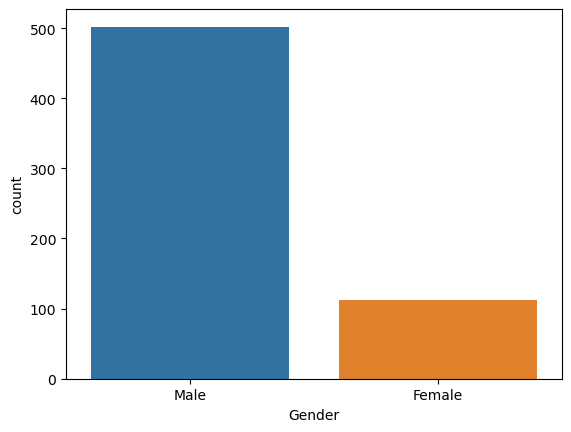

In [17]:
# Categorical Attributes Visualization
sns.countplot(df['Gender'])

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

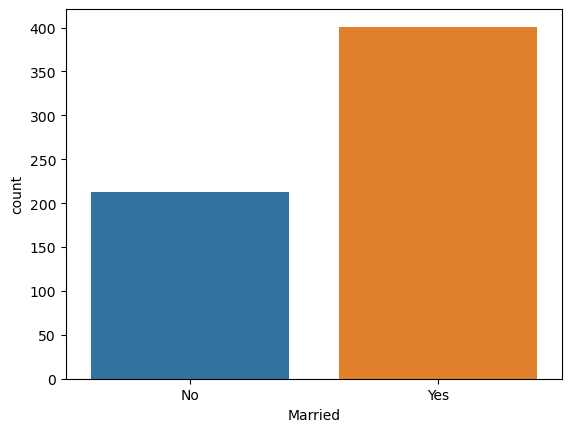

In [18]:
sns.countplot(df['Married'])

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

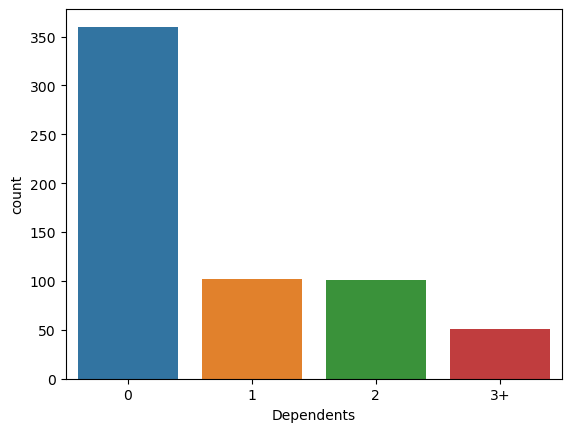

In [19]:
sns.countplot(df['Dependents'])

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

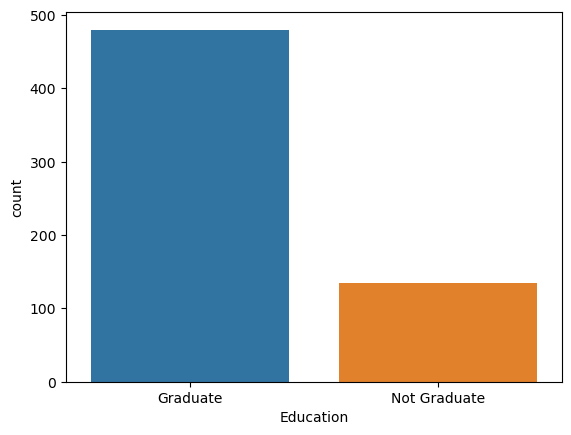

In [20]:
sns.countplot(df['Education'])

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

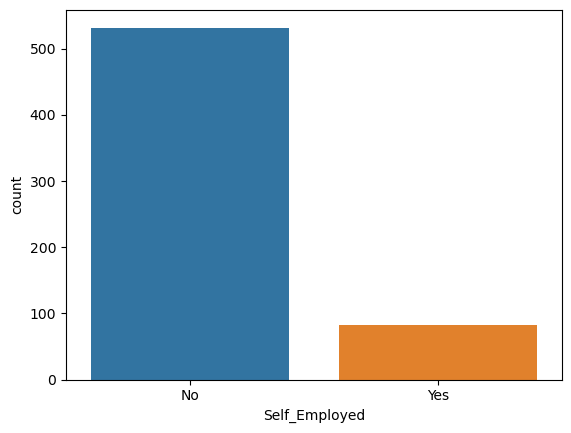

In [21]:
sns.countplot(df['Self_Employed'])

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

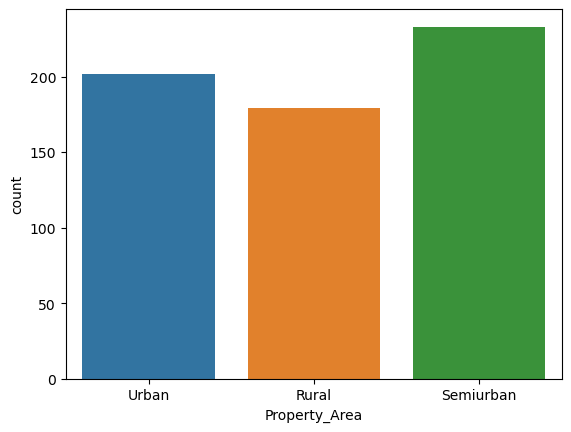

In [22]:
sns.countplot(df['Property_Area'])

C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

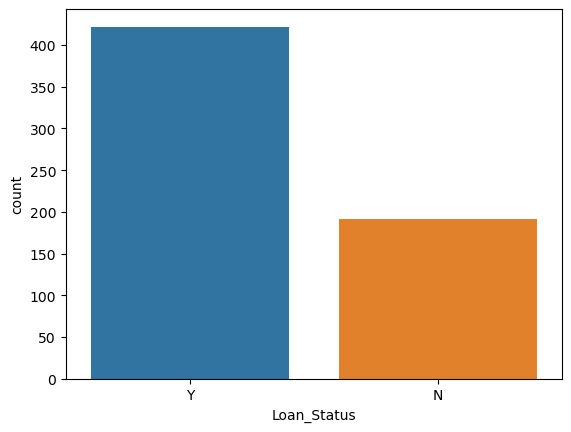

In [23]:
sns.countplot(df['Loan_Status'])

Text(0.5, 1.0, 'Boxplot of ApplicantIncome')

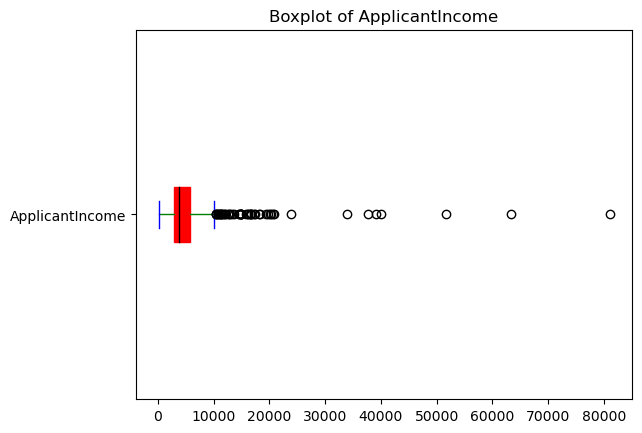

In [24]:
# Numerical attributes Visualization
# # Box plot for ApplicantIncome
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')
df.ApplicantIncome.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of ApplicantIncome')




In [25]:
# There are outliers
#Getting the Iqr, up_lim & low_lim
iqr = df.ApplicantIncome.describe()['75%'] - df.ApplicantIncome.describe()['25%'] 
iqr


2917.5

In [26]:
up_lim = df.ApplicantIncome.describe()['75%']+1.5*iqr #16
up_lim


10171.25

In [27]:
len(df.ApplicantIncome[df.ApplicantIncome > up_lim]) 


50

In [28]:
# capping _ change the outlier values to upper or lower limit
new_df = df.copy()
new_df.loc[(new_df['ApplicantIncome']>up_lim), 'ApplicantIncome'] = up_lim


Text(0.5, 1.0, 'Boxplot of ApplicantIncome')

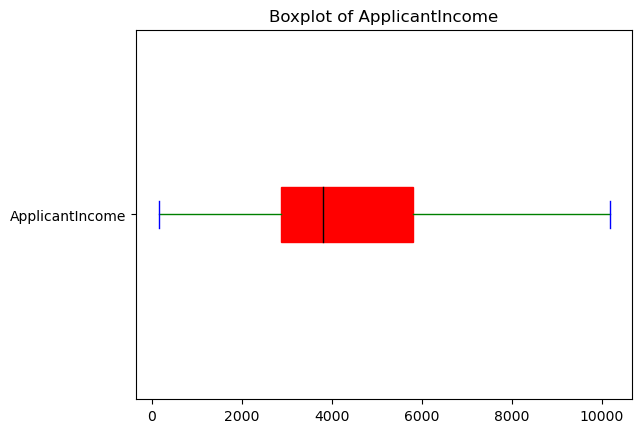

In [29]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')
new_df.ApplicantIncome.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of ApplicantIncome')


In [30]:
new_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4617.111564,1621.245798,146.412162,342.000000,0.855049
std,2479.851729,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,10171.250000,41667.000000,700.000000,480.000000,1.000000


C:\Users\om\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

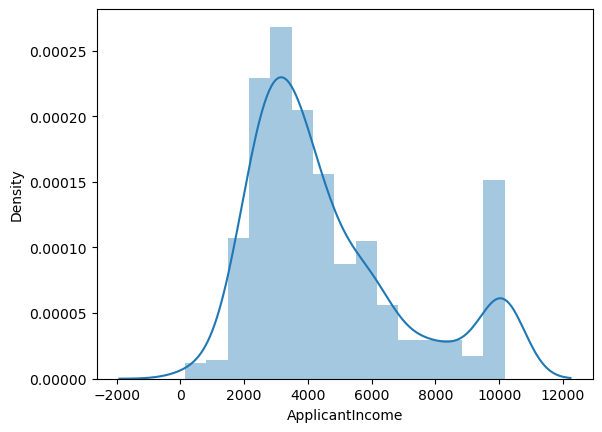

In [31]:
sns.distplot(new_df['ApplicantIncome'])

In [32]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


Text(0.5, 1.0, 'Boxplot of CoapplicantIncome')

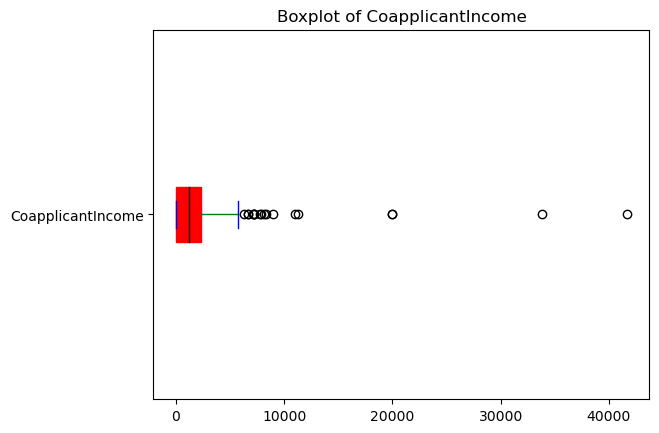

In [33]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')
new_df.CoapplicantIncome.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of CoapplicantIncome')


In [34]:
# There are outliers
#Getting the Iqr, up_lim & low_lim
iqr = new_df.CoapplicantIncome.describe()['75%'] - df.CoapplicantIncome.describe()['25%'] 
iqr


2297.25

In [35]:
up_lim = new_df.CoapplicantIncome.describe()['75%']+1.5*iqr 
up_lim


5743.125

In [36]:
len(new_df.CoapplicantIncome[new_df.CoapplicantIncome > up_lim])

18

In [37]:
# capping _ change the outlier values to upper or lower limit
new_df.loc[(new_df['CoapplicantIncome']>up_lim), 'CoapplicantIncome'] = up_lim

Text(0.5, 1.0, 'Boxplot of CoapplicantIncome')

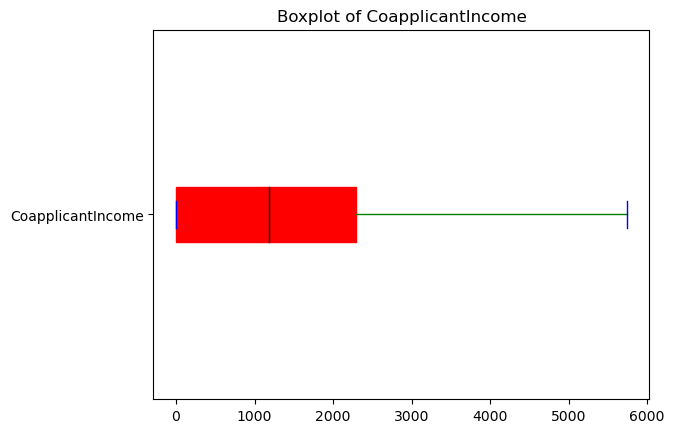

In [38]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')
new_df.CoapplicantIncome.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of CoapplicantIncome')

In [39]:
new_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4617.111564,1419.702231,146.412162,342.000000,0.855049
std,2479.851729,1624.605892,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,10171.250000,5743.125000,700.000000,480.000000,1.000000


In [40]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y


In [41]:
# creation of new attributes
# Total income
new_df['Total_Income'] = new_df['ApplicantIncome'] + new_df['CoapplicantIncome']

In [42]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


Text(0.5, 1.0, 'Boxplot of Total_Income')

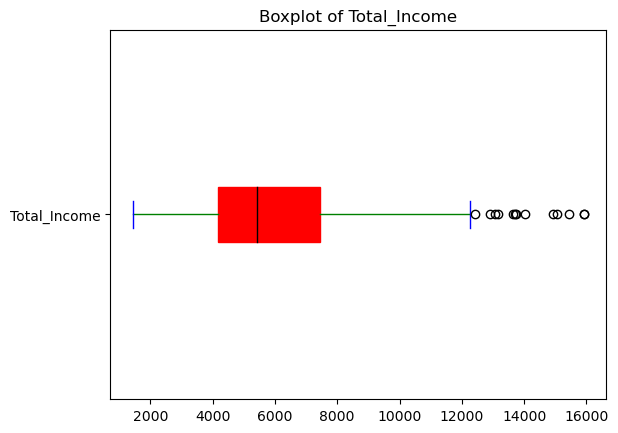

In [43]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')
new_df.Total_Income.plot.box(color=props2, patch_artist = True, vert = False,grid=False)
plt.title('Boxplot of Total_Income')

In [44]:
# There are outliers
#Getting the Iqr, up_lim & low_lim
iqr = new_df.Total_Income.describe()['75%'] - new_df.Total_Income.describe()['25%'] 
iqr

3286.5

In [45]:
up_lim = new_df.Total_Income.describe()['75%']+1.5*iqr 
up_lim

12382.25

In [46]:
len(new_df.Total_Income[new_df.Total_Income > up_lim])

13

In [47]:
# capping _ change the outlier values to upper or lower limit
new_df.loc[(new_df['Total_Income']>up_lim), 'Total_Income'] = up_lim

Text(0.5, 1.0, 'Boxplot of Total_Income')

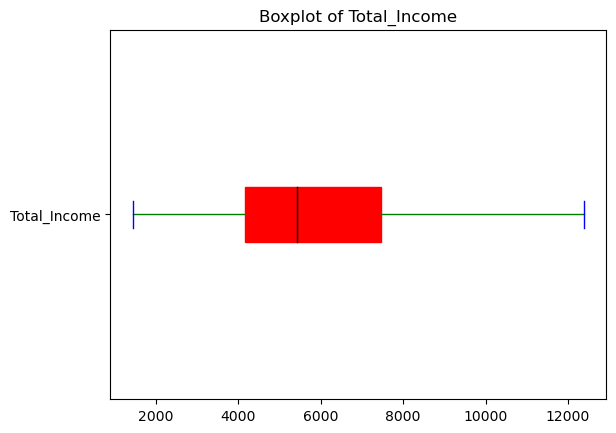

In [48]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')
new_df.Total_Income.plot.box(color=props2, patch_artist = True, vert = False,grid=False)
plt.title('Boxplot of Total_Income')

C:\Users\om\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

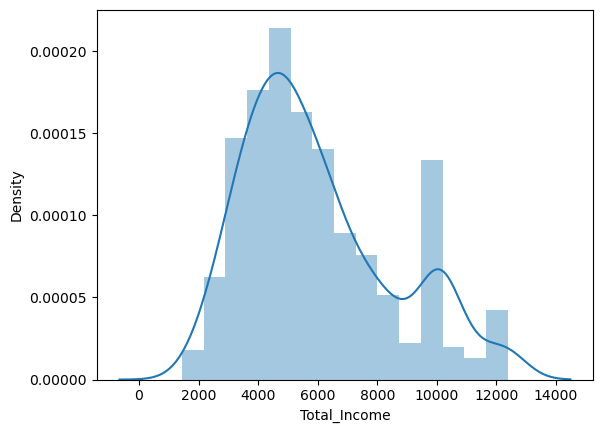

In [49]:
sns.distplot(new_df['Total_Income'])

In [50]:
from scipy. stats import skew

In [51]:
print(skew(new_df['Total_Income']))

0.749962883215752


In [52]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


Text(0.5, 1.0, 'Boxplot of LoanAmount')

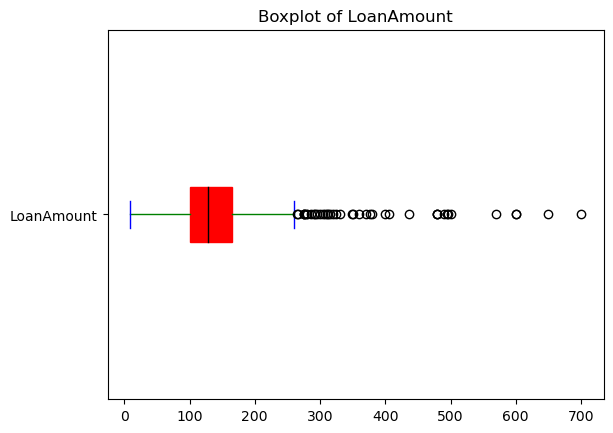

In [53]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')
new_df.LoanAmount.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of LoanAmount')

In [54]:
# There are outliers
#Getting the Iqr, up_lim & low_lim
iqr = new_df.LoanAmount.describe()['75%'] - df.LoanAmount.describe()['25%'] 
iqr

64.5

In [55]:
up_lim = new_df.LoanAmount.describe()['75%']+1.5*iqr 
up_lim

261.5

In [56]:
len(new_df.LoanAmount[new_df.LoanAmount > up_lim])

41

In [57]:
# capping _ change the outlier values to upper or lower limit
new_df.loc[(new_df['LoanAmount']>up_lim), 'LoanAmount'] = up_lim

Text(0.5, 1.0, 'Boxplot of LoanAmount')

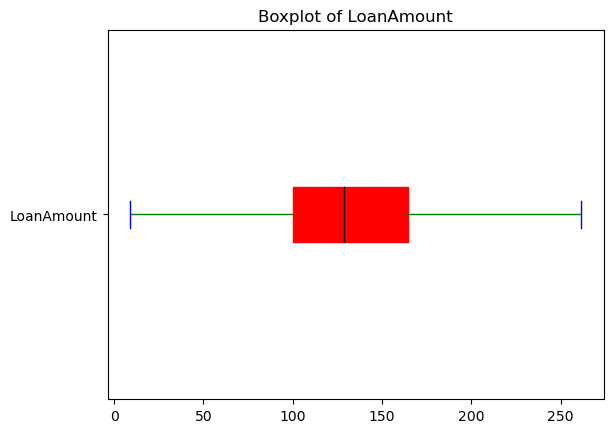

In [58]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'blue')
new_df.LoanAmount.plot.box(color=props2, patch_artist = True, vert = False)
plt.title('Boxplot of LoanAmount')

C:\Users\om\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

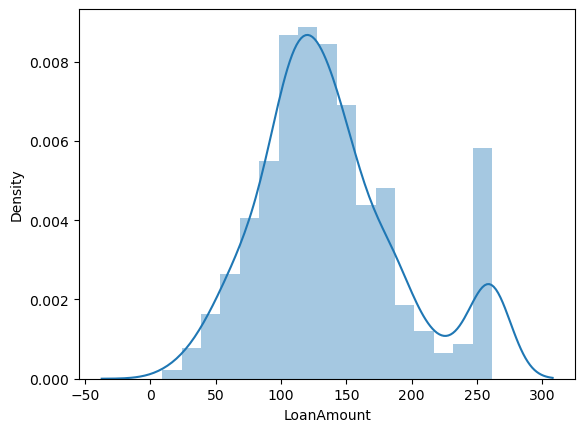

In [59]:
sns.distplot(new_df['LoanAmount'])

In [60]:
print(skew(new_df['LoanAmount']))

0.6470414088721413


In [61]:
new_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4617.111564,1419.702231,138.025354,342.000000,0.855049,5999.391767
std,2479.851729,1624.605892,55.773951,64.372489,0.352339,2524.636595
min,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,5416.500000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,7452.500000
max,10171.250000,5743.125000,261.500000,480.000000,1.000000,12382.250000


In [62]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

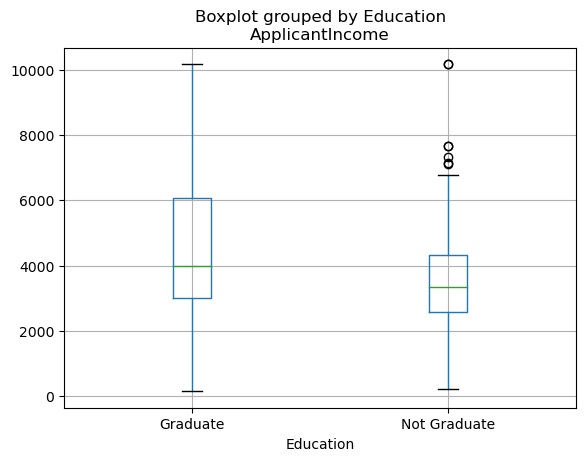

In [63]:
# ApplicantIncome by education
new_df.boxplot(column='ApplicantIncome', by= 'Education')

In [64]:
# lets convert all Categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df['Gender'] = le.fit_transform(new_df['Gender'])
new_df.Gender.value_counts()
sns.set(style="whitegrid", color_codes=True)


In [65]:
# Loan_Status
new_df['Loan_Status'] = le.fit_transform(new_df['Loan_Status'])
new_df.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [66]:
# Married
new_df['Married'] = le.fit_transform(new_df['Married'])
new_df.Married.value_counts()

1    401
0    213
Name: Married, dtype: int64

In [67]:
# Education
new_df['Education'] =new_df.get('Education').replace('Graduate',1)
new_df['Education'] =new_df.get('Education').replace('Not Graduate',0)
new_df.Education.value_counts()


1    480
0    134
Name: Education, dtype: int64

In [68]:
# Self_Employed
new_df['Self_Employed'] = le.fit_transform(new_df['Self_Employed'])
new_df.Self_Employed.value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [69]:
# Property_Area
new_df['Property_Area'] = le.fit_transform(new_df['Property_Area'])
new_df.Property_Area.value_counts()

1    233
2    202
0    179
Name: Property_Area, dtype: int64

In [70]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,1,0,5849.0,0.0,146.412162,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1,1,0,4583.0,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0,1,1,3000.0,0.0,66.000000,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0,0,0,2583.0,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0,1,0,6000.0,0.0,141.000000,360.0,1.0,2,1,6000.0


In [71]:
# Relationship of categorical with target variable
# Gender and Loan_Status
CrosstabResult = pd.crosstab(index=new_df['Gender'],columns=new_df['Loan_Status'])
print(CrosstabResult)

Loan_Status    0    1
Gender               
0             37   75
1            155  347


<AxesSubplot:xlabel='Gender'>

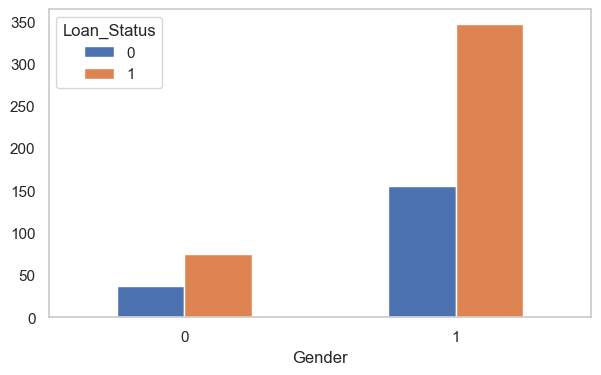

In [72]:
%matplotlib inline
CrosstabResult.plot.bar(figsize = (7,4) , rot=0, grid=False) 

Loan_Status    0    1
Married              
0             79  134
1            113  288


<AxesSubplot:xlabel='Married'>

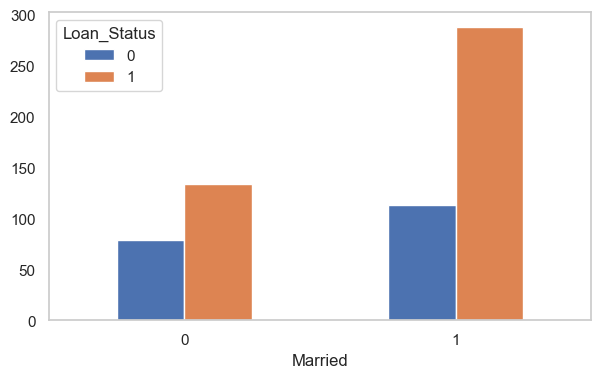

In [73]:
# Married and Loan_Status
CrosstabResult = pd.crosstab(index=new_df['Married'],columns=new_df['Loan_Status'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize = (7,4) , rot=0, grid=False) 


Loan_Status    0    1
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33


<AxesSubplot:xlabel='Dependents'>

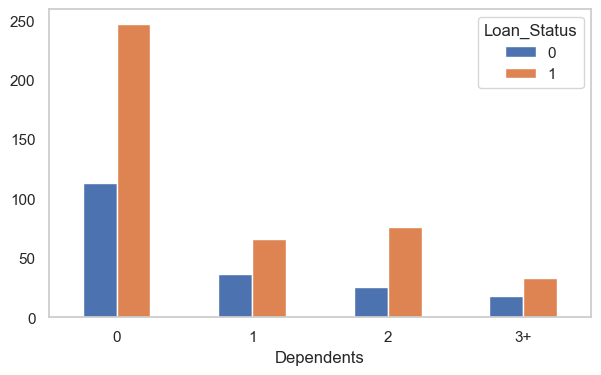

In [74]:
# Dependents and Loan_Status
CrosstabResult = pd.crosstab(index=new_df['Dependents'],columns=new_df['Loan_Status'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize = (7,4) , rot=0, grid=False) 

Loan_Status    0    1
Education            
0             52   82
1            140  340


<AxesSubplot:xlabel='Education'>

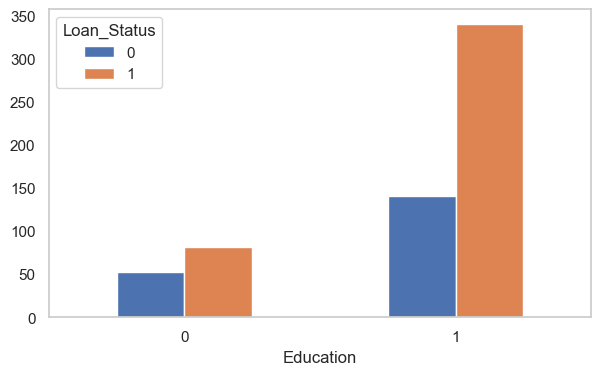

In [75]:
# Education and Loan_Status
CrosstabResult = pd.crosstab(index=new_df['Education'],columns=new_df['Loan_Status'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize = (7,4) , rot=0, grid=False)

Loan_Status      0    1
Self_Employed          
0              166  366
1               26   56


<AxesSubplot:xlabel='Self_Employed'>

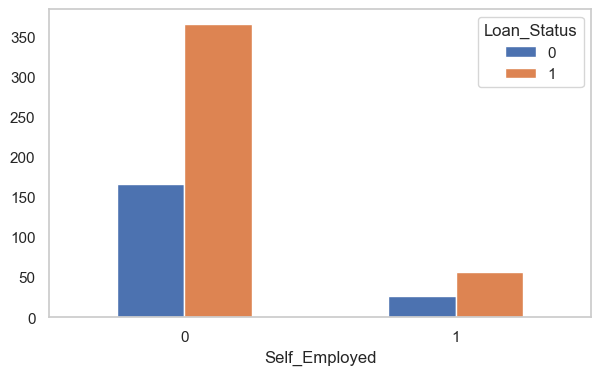

In [76]:
# Self_ Employed and Loan_Status
CrosstabResult = pd.crosstab(index=new_df['Self_Employed'],columns=new_df['Loan_Status'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize = (7,4) , rot=0, grid=False)

In [77]:
new_df.Self_Employed.value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

Loan_Status     0    1
Property_Area         
0              69  110
1              54  179
2              69  133


<AxesSubplot:xlabel='Property_Area'>

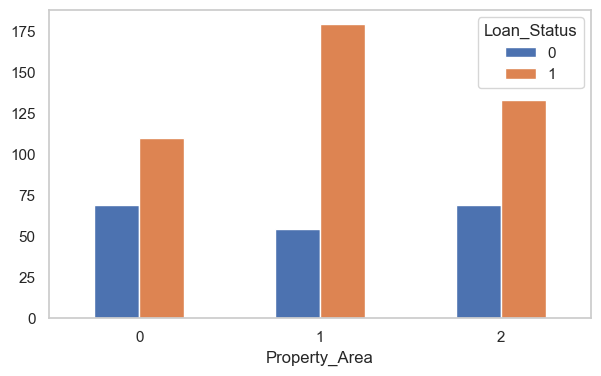

In [78]:
# Property area and Loan_Status
CrosstabResult = pd.crosstab(index=new_df['Property_Area'],columns=new_df['Loan_Status'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize = (7,4) , rot=1, grid=False)

Loan_Status       0    1
Credit_History          
0.0              82    7
1.0             110  415


<AxesSubplot:xlabel='Credit_History'>

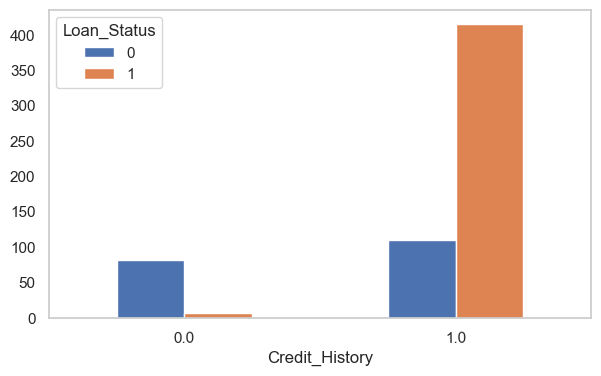

In [79]:
# credit_History and Loan_Status
CrosstabResult = pd.crosstab(index=new_df['Credit_History'],columns=new_df['Loan_Status'])
print(CrosstabResult)
CrosstabResult.plot.bar(figsize = (7,4) , rot=1, grid=False)

<AxesSubplot:title={'center':'Total_Income'}, xlabel='Loan_Status'>

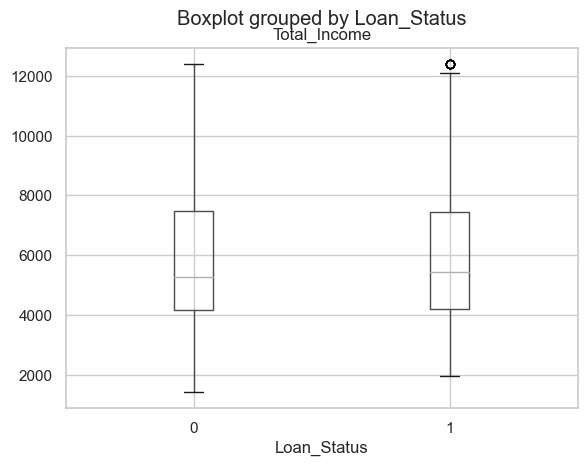

In [80]:
# Relationship of continous with target variable
# Total_Income and Loan_Status
new_df.boxplot(column='Total_Income', by= 'Loan_Status')


<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Loan_Status'>

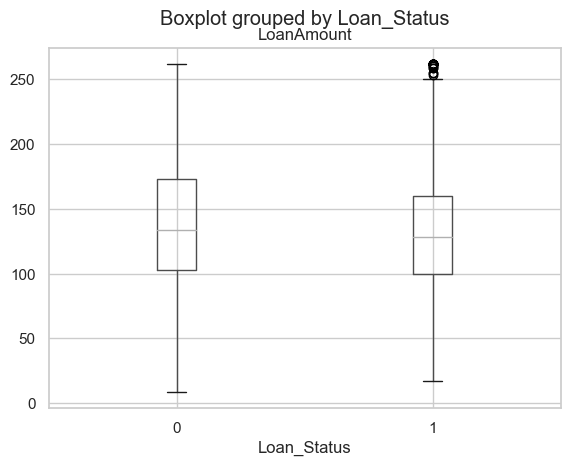

In [81]:
# LoanAmount and Loan_Status
new_df.boxplot(column='LoanAmount', by= 'Loan_Status')

In [82]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,1,0,5849.0,0.0,146.412162,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1,1,0,4583.0,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0,1,1,3000.0,0.0,66.000000,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0,0,0,2583.0,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0,1,0,6000.0,0.0,141.000000,360.0,1.0,2,1,6000.0


In [83]:
# Drop unwanted columns
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
 13  Total_Income       614 non-null    float64
dtypes: float64(6), int32(5), int64(1), object(2)
memory usage: 55.3+ KB


In [84]:
# Converting Dependents from string to int
new_df['Dependents'] = new_df['Dependents'].str.replace('+', '',regex=True)


In [85]:
new_df['Dependents'] = new_df['Dependents'].astype(int)

In [86]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
 13  Total_Income       614 non-null    float64
dtypes: float64(6), int32(6), int64(1), object(1)
memory usage: 52.9+ KB


In [87]:
new_df=new_df.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome'], axis = 1)


In [88]:
new_df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,1,0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,1,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,1,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,0,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,1,0,141.000000,360.0,1.0,2,1,6000.0


In [89]:
# Shifting Total_income column to first
cols = list(new_df.columns)
cols = [cols[-1]] + cols[:-1]
new_df = new_df[cols]

In [90]:
new_df.tail()

,Total_Income,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,2900.0,0,0,0,1,0,71.0,360.0,1.0,0,1
610,4106.0,1,1,3,1,0,40.0,180.0,1.0,0,1
611,8312.0,1,1,1,1,0,253.0,360.0,1.0,2,1
612,7583.0,1,1,2,1,0,187.0,360.0,1.0,2,1
613,4583.0,0,0,0,1,1,133.0,360.0,0.0,1,0


In [91]:
#Assigning predictors & response variable
new_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Total_Income      614 non-null    float64
 1   Gender            614 non-null    int32  
 2   Married           614 non-null    int32  
 3   Dependents        614 non-null    int32  
 4   Education         614 non-null    int64  
 5   Self_Employed     614 non-null    int32  
 6   LoanAmount        614 non-null    float64
 7   Loan_Amount_Term  614 non-null    float64
 8   Credit_History    614 non-null    float64
 9   Property_Area     614 non-null    int32  
 10  Loan_Status       614 non-null    int32  
dtypes: float64(4), int32(6), int64(1)
memory usage: 38.5 KB


In [92]:
new_df.corr()

,Total_Income,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Total_Income,1.000000,0.180713,0.155418,0.086865,0.223754,0.199657,0.693592,-0.041105,0.032839,-0.070002,0.012334
Gender,0.180713,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.144853,-0.073567,0.009170,-0.025752,0.017987
Married,0.155418,0.364569,1.000000,0.334216,-0.012304,0.004489,0.178150,-0.100863,0.010938,0.004257,0.091478
Dependents,0.086865,0.172914,0.334216,1.000000,-0.055752,0.056798,0.164333,-0.101054,-0.040160,-0.000244,0.010118
Education,0.223754,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.173348,0.077242,0.073658,0.065243,0.085884
Self_Employed,0.199657,-0.000525,0.004489,0.056798,0.010383,1.000000,0.114407,-0.033943,-0.001550,-0.030860,-0.003700
LoanAmount,0.693592,0.144853,0.178150,0.164333,0.173348,0.114407,1.000000,0.065393,0.003080,-0.072187,-0.052050
Loan_Amount_Term,-0.041105,-0.073567,-0.100863,-0.101054,0.077242,-0.033943,0.065393,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.032839,0.009170,0.010938,-0.040160,0.073658,-0.001550,0.003080,0.000432,1.000000,0.001963,0.540556
Property_Area,-0.070002,-0.025752,0.004257,-0.000244,0.065243,-0.030860,-0.072187,-0.077620,0.001963,1.000000,0.032112


In [93]:
np.triu(np.ones(new_df.corr().shape))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [94]:
mask = np.triu(np.ones(new_df.corr().shape))

cor = new_df.corr()
cor = cor[(cor > .90) | (cor < -.90)]

C:\Users\om\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\om\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


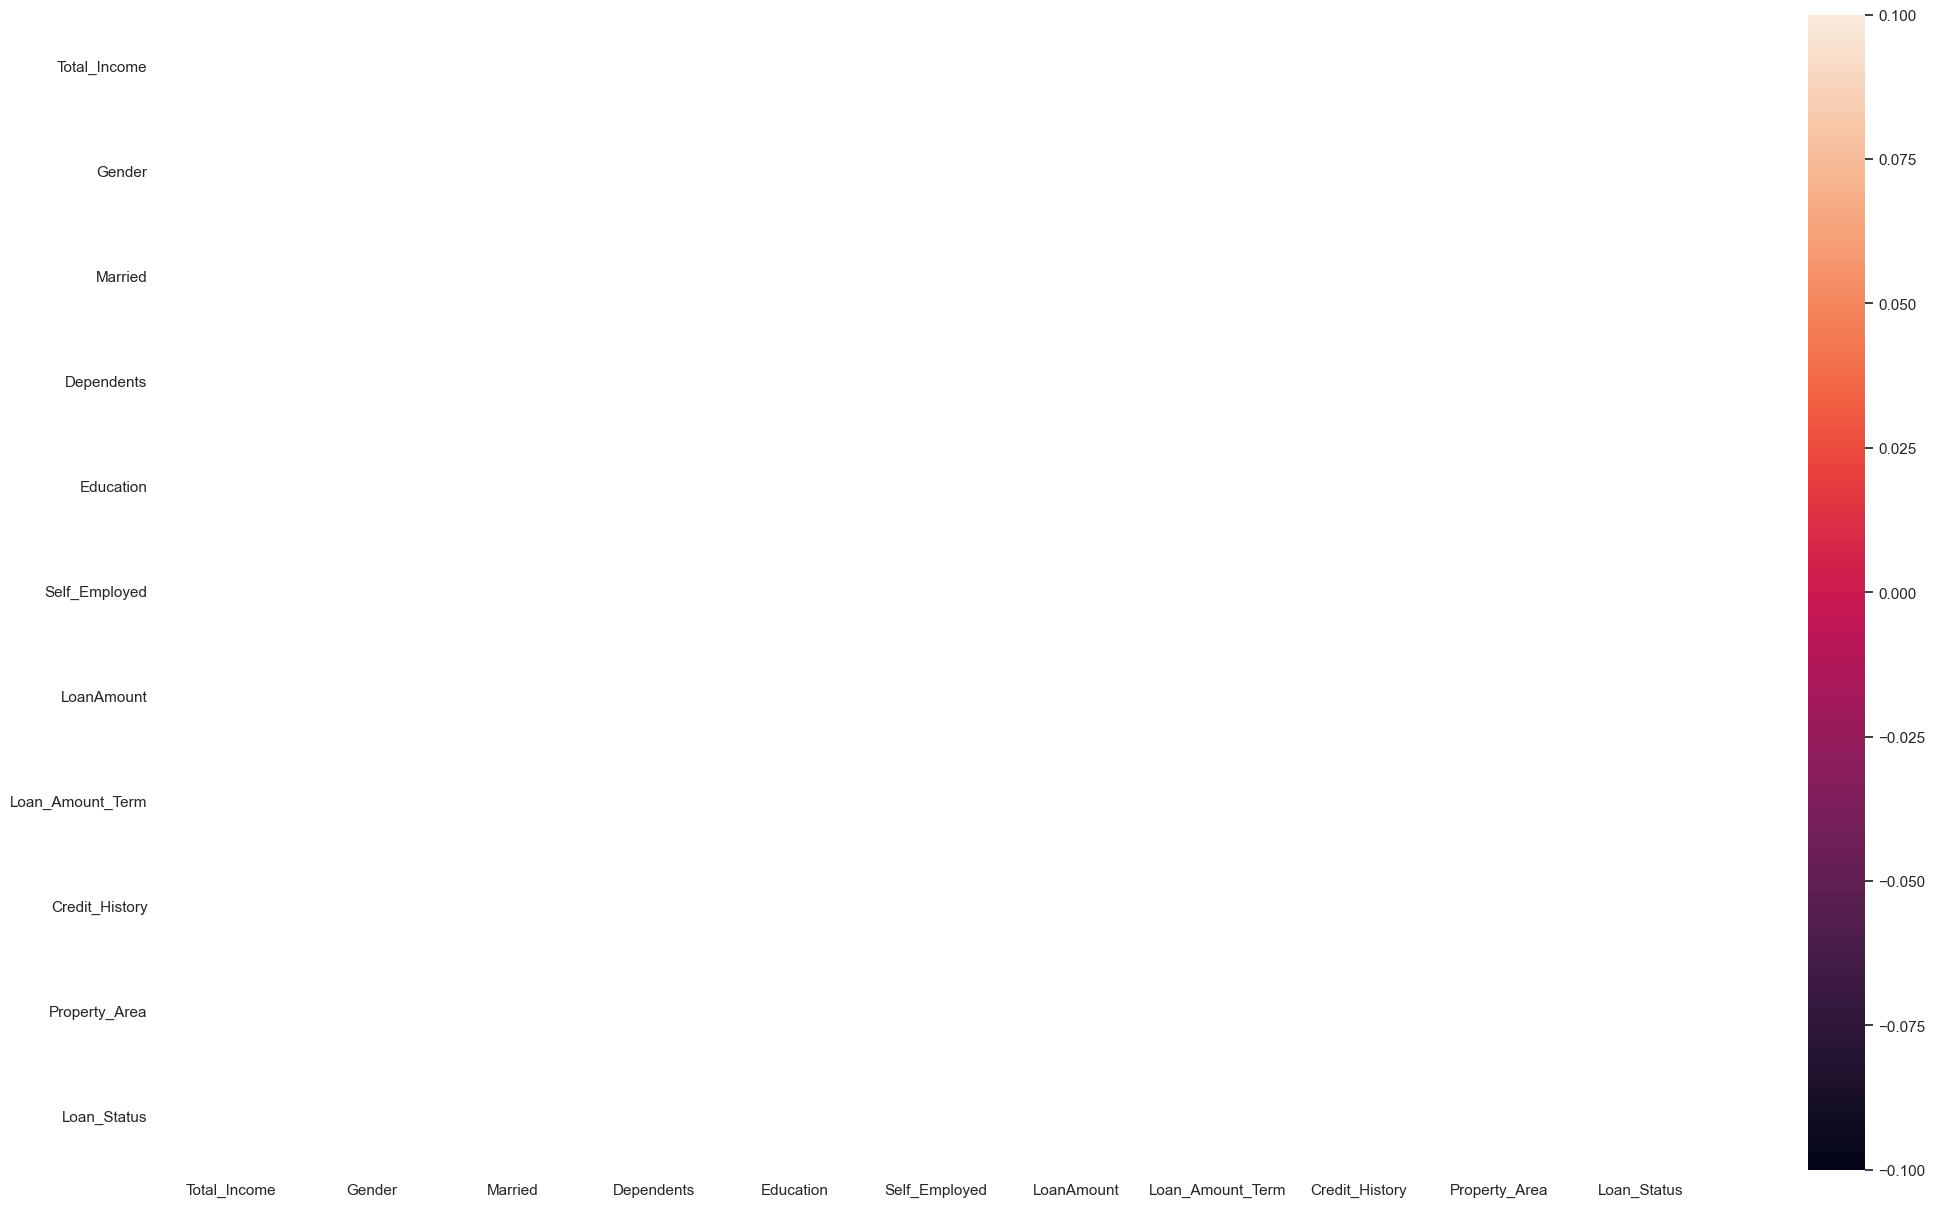

In [95]:
plt.figure(figsize=(25,15))
sns.heatmap(cor,  mask=mask, annot=True)
plt.show()

In [96]:
y = new_df.iloc[:,-1]
y


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [97]:
x = new_df.iloc[:,:-1]
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Total_Income      614 non-null    float64
 1   Gender            614 non-null    int32  
 2   Married           614 non-null    int32  
 3   Dependents        614 non-null    int32  
 4   Education         614 non-null    int64  
 5   Self_Employed     614 non-null    int32  
 6   LoanAmount        614 non-null    float64
 7   Loan_Amount_Term  614 non-null    float64
 8   Credit_History    614 non-null    float64
 9   Property_Area     614 non-null    int32  
dtypes: float64(4), int32(5), int64(1)
memory usage: 36.1 KB


In [98]:
#Splitting data into training and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=123)

In [99]:
len(x_train)

460

In [100]:

len(x_test)

154

In [101]:
len(y_train)

460

In [102]:
len(y_test)

154

# Handling unbalanced data

In [103]:
# Get the yes and no from the dataset
yes = new_df[new_df['Loan_Status']==1]
no = new_df[new_df['Loan_Status']==0]

In [104]:
print(no.shape,yes.shape)

(192, 11) (422, 11)


C:\Users\om\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

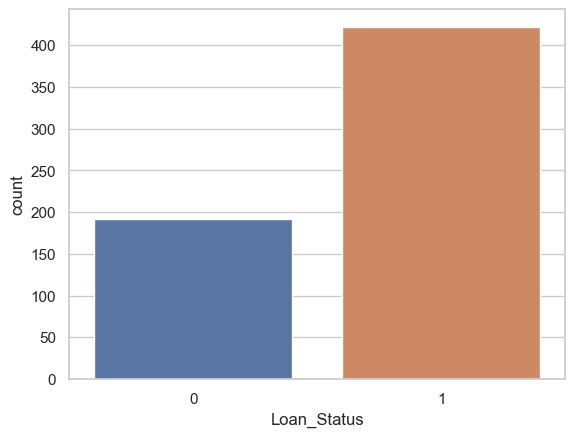

In [105]:
sns.countplot(new_df['Loan_Status'])


In [106]:
from imblearn.under_sampling import NearMiss

from sklearn.datasets import make_classification

In [107]:
# implementing undersampling for handling imbalanced
from imblearn.under_sampling import RandomUnderSampler  

under_sampler = RandomUnderSampler()
x_res, y_res = under_sampler.fit_resample(x, y)

In [108]:
x_res.shape , y_res.shape

((384, 10), (384,))

In [109]:
from collections import Counter
print('Original dataset shape{}'.format(Counter(y)))
print('Resampled dataset dataset shape({}'.format(Counter(y_res)))


Original dataset shapeCounter({1: 422, 0: 192})
Resampled dataset dataset shape(Counter({0: 192, 1: 192})


In [110]:
#Splitting data into training and test
x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(x_res,y_res, test_size=0.25, random_state=123)

In [111]:
# feature importance
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,
                           bootstrap = True,
                           max_features = 'sqrt')
rfFit=rf.fit(x_res_train,y_res_train)
fi = pd.DataFrame({'feature': list(x_res_train.columns),
                   'importance':rfFit.feature_importances_}).\
                    sort_values('importance', ascending=False)

In [112]:
fi

,feature,importance
0,Total_Income,0.272453
6,LoanAmount,0.256363
8,Credit_History,0.171629
9,Property_Area,0.065138
3,Dependents,0.062152
7,Loan_Amount_Term,0.054243
2,Married,0.033797
4,Education,0.029610
1,Gender,0.027686
5,Self_Employed,0.026929


# Model 1 Random Forest

Text(0, 0.5, 'Testing Accuracy')

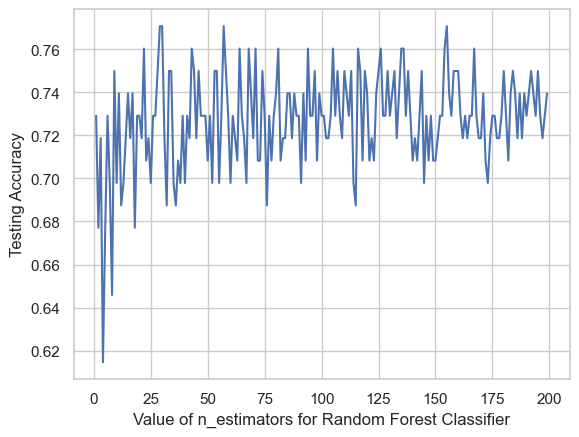

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1, 200):
    rfc = RandomForestClassifier(n_estimators=k)
    rfc.fit(x_res_train, y_res_train)
    y_pred = rfc.predict(x_res_test)
    scores.append(accuracy_score(y_res_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(range(1, 200), scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [114]:
# Model 1 Random Forest
from sklearn.ensemble import RandomForestClassifier
#Create Model with 300 trees
rfc = RandomForestClassifier(n_estimators=70)


In [115]:
#Fitting the model
df_rfc = rfc.fit(x_res_train, y_res_train)

In [116]:
#Prediction
y_predrfc = df_rfc.predict(x_res_test)

In [117]:
#Confusion Matrix & Report
pd.crosstab(y_res_test,y_predrfc, margins=True,rownames=['Actual'], colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,32,16,48
1,12,36,48
All,44,52,96


In [118]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_res_test,y_predrfc) 


0.7083333333333334

In [119]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_res_test, y_predrfc))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        48
           1       0.69      0.75      0.72        48

    accuracy                           0.71        96
   macro avg       0.71      0.71      0.71        96
weighted avg       0.71      0.71      0.71        96



# Model 2 Gaussian Naive Bayes model

In [120]:
# Model 2 Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
df_gnb = gnb.fit(x_res_train,y_res_train)

In [121]:
# prediction
y_predgnb = df_gnb.predict(x_res_test)
len(y_predgnb)

96

In [122]:
#confusion matrix & report
pd.crosstab(y_res_test,y_predgnb, margins = True, rownames=['Actual'], colnames=['Predict'])

Predict,0,1,All
Actual,,,
0,28,20,48
1,5,43,48
All,33,63,96


In [123]:
# Accuaracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_res_test,y_predgnb)

0.7395833333333334

In [124]:
# classificaton report
from sklearn.metrics import classification_report
print(classification_report(y_res_test, y_predgnb))

              precision    recall  f1-score   support

           0       0.85      0.58      0.69        48
           1       0.68      0.90      0.77        48

    accuracy                           0.74        96
   macro avg       0.77      0.74      0.73        96
weighted avg       0.77      0.74      0.73        96



# Model 3 Adaboosting

In [125]:
# Model 3 Adaboosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adafit = ada.fit(x_res_train,y_res_train)


In [126]:
adafit

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

In [127]:
y_predADA = ada.predict(x_res_test)

In [128]:
len(y_predADA)

96

In [129]:
y_predADA

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1])

In [130]:
# Results and report
pd.crosstab(y_res_test,y_predADA,margins = True, rownames= ['Actual'], colnames = ['Predict'])

Predict,0,1,All
Actual,,,
0,28,20,48
1,9,39,48
All,37,59,96


In [131]:
print(classification_report(y_res_test,y_predADA))

              precision    recall  f1-score   support

           0       0.76      0.58      0.66        48
           1       0.66      0.81      0.73        48

    accuracy                           0.70        96
   macro avg       0.71      0.70      0.69        96
weighted avg       0.71      0.70      0.69        96



In [132]:
# Probabilities
predP_ADA = adafit.predict_proba(x_res_test)[:,1]

In [133]:
predP_ADA

array([0.52017493, 0.50449265, 0.49702515, 0.50403886, 0.46081398,
       0.50197538, 0.50289921, 0.5152347 , 0.50272781, 0.49831965,
       0.5014831 , 0.50032018, 0.50353003, 0.5081137 , 0.47923083,
       0.49913196, 0.5011026 , 0.49436667, 0.49586957, 0.50021693,
       0.49748398, 0.49664328, 0.50415222, 0.50229589, 0.50251269,
       0.49675616, 0.49350558, 0.49813115, 0.50125819, 0.43165147,
       0.50317218, 0.49700429, 0.50026409, 0.50090633, 0.50061535,
       0.49631168, 0.50052887, 0.50096429, 0.50289061, 0.49600586,
       0.50376895, 0.50083889, 0.49334208, 0.50206376, 0.4987239 ,
       0.50022081, 0.50099096, 0.49712953, 0.50158161, 0.50169456,
       0.49614904, 0.5011733 , 0.5025018 , 0.50194698, 0.50139019,
       0.5017612 , 0.50418008, 0.49794344, 0.49601135, 0.50023526,
       0.50223126, 0.50134365, 0.50291735, 0.49691614, 0.50142125,
       0.50377217, 0.50183385, 0.49898121, 0.50204921, 0.49814579,
       0.50539784, 0.49791902, 0.49559155, 0.49394411, 0.50276

In [134]:
# ROC Curve
false_positive_rateADA, true_positive_rateADA,thresholdsADA = sklearn.metrics.roc_curve(y_res_test,predP_ADA)

In [135]:
roc_aucADA = auc(false_positive_rateADA, true_positive_rateADA)

In [136]:
roc_aucADA

0.7282986111111112

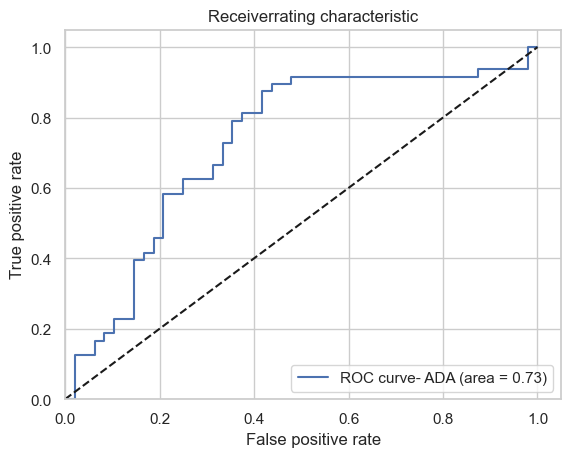

In [137]:
# Let's plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateADA, true_positive_rateADA, label= 'ROC curve- ADA (area = %0.2f)'% roc_aucADA)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiverrating characteristic')
plt.legend(loc ='lower right')
plt.show()

# Model 4 Logistic Regression

In [138]:
# Model 4 Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', random_state = 0)
model1.fit(x_res_train,y_res_train)
model1.intercept_


array([-1.46758149])

In [139]:
model1.coef_

array([[ 8.20815901e-05, -3.21068869e-01,  6.30256563e-01,
         1.29976720e-01,  2.82459047e-01,  2.08117237e-02,
        -5.52572614e-03, -2.00732746e-03,  2.35041288e+00,
         6.74796416e-02]])

In [140]:
# Predictions
y_predL = model1.predict(x_res_test)
#confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_res_test, y_predL)
print(cm)

[[29 19]
 [ 7 41]]


In [141]:
# Accuracy score correct predictions / total number of data points
model1.score(x_res_train, y_res_train)

0.6840277777777778

In [142]:
# classification report
print(classification_report(y_res_test, y_predL))

              precision    recall  f1-score   support

           0       0.81      0.60      0.69        48
           1       0.68      0.85      0.76        48

    accuracy                           0.73        96
   macro avg       0.74      0.73      0.72        96
weighted avg       0.74      0.73      0.72        96



# KNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [144]:
print("length of x_train:",len(x_res_train)) 
print("length of x_test:",len(x_res_test)) 
print("length of y_train:",len(y_res_train))
print("length of y_test:",len(y_res_test)) 

length of x_train: 288
length of x_test: 96
length of y_train: 288
length of y_test: 96


In [145]:
# Using 'for-loop' to find optimum n_neighbor value

In [146]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [147]:
# Using "for loop" to find n_neghbor value
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_res_train, y_res_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_res_train, y_res_train)
    test_accuracy[i] = knn.score(x_res_test, y_res_test)

C:\Users\om\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\om\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\om\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\om\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\om\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\om\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

C:\Users\om\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\om\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to 

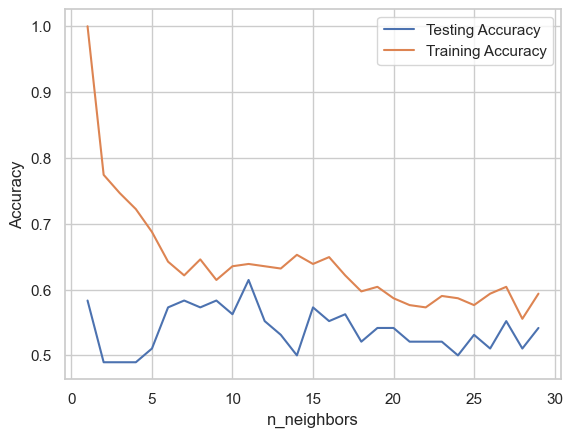

In [148]:
#We have the accuracy, lets plot
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [149]:
''' We can see from the graph that @n_neighbors = 17 we are getting 
the highest accuracy in test dataset and and the minimum difference 
between train accuray and test accuracy.
Therefore, the optimum value of K is 17.'''

' We can see from the graph that @n_neighbors = 17 we are getting \nthe highest accuracy in test dataset and and the minimum difference \nbetween train accuray and test accuracy.\nTherefore, the optimum value of K is 17.'

In [150]:
# Building Model with obtained @ n_neighbors = 17

In [151]:
#Building Model @ n_neighbors = 26
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 17,algorithm= 'auto')
print(knn) 

KNeighborsClassifier(n_neighbors=17)


In [152]:
knn_mod = knn.fit(x_res_train, y_res_train) 
print(knn_mod)

KNeighborsClassifier(n_neighbors=17)


In [153]:
#Applying on Test data for prediction
y_pred_knn = knn_mod.predict(x_res_test)
print(y_pred_knn)

[1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1]


C:\Users\om\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [154]:
#Prediction Score
knn_mod.score(x_res_test, y_res_test)

C:\Users\om\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.5625

In [155]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_res_test, y_pred_knn) 

0.5625

In [156]:
# creating a confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_res_test, y_pred_knn)
cm_knn

array([[18, 30],
       [12, 36]], dtype=int64)

In [157]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_res_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.60      0.38      0.46        48
           1       0.55      0.75      0.63        48

    accuracy                           0.56        96
   macro avg       0.57      0.56      0.55        96
weighted avg       0.57      0.56      0.55        96



# Gradient Boosting

In [158]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [159]:
GB = GradientBoostingClassifier()

In [160]:
GB_mod = GB.fit(x_res_train, y_res_train)

In [161]:
#Prediction 
y_train_GB = GB_mod.predict(x_res_train)
y_train_GB

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1])

In [162]:
#Prediction 
y_test_GB = GB_mod.predict(x_res_test)
y_test_GB

array([0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1])

In [163]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_res_train,y_train_GB), 2))
print(round(accuracy_score(y_res_test,y_test_GB), 2))


0.94
0.73


In [164]:
#Grid Search - Gradient Boosting 
#Probability

gbm_parameters = {"learning_rate" : [0.001, 0.1, 0.5, 0.75, 1],
             "n_estimators": [20,50,60],
             "ccp_alpha": [0.038],
             "min_samples_split": [2,4,6,8,10]
                 }

In [165]:
GB = GradientBoostingClassifier()
GB_mod1 = GridSearchCV(GB, gbm_parameters,
                      cv = 5,
                      n_jobs = -1,
                      verbose = False)

In [166]:
GB_mod1.fit(x_res_train, y_res_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.038],
                         'learning_rate': [0.001, 0.1, 0.5, 0.75, 1],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [20, 50, 60]},
             verbose=False)

In [167]:
#Best Parameters
print(GB_mod1.best_params_)


{'ccp_alpha': 0.038, 'learning_rate': 0.001, 'min_samples_split': 2, 'n_estimators': 20}


In [168]:
GB_mod_Best = GradientBoostingClassifier(
                 n_estimators = 20,
                   min_samples_split = 2,
                  learning_rate = 0.001,
                  ccp_alpha= 0.038
)


In [169]:
GB_mod_Best.fit(x_res_train, y_res_train)

GradientBoostingClassifier(ccp_alpha=0.038, learning_rate=0.001,
                           n_estimators=20)

In [170]:
y_train_GB1 = GB_mod_Best.predict(x_res_train)
y_train_GB1


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1])

In [171]:
y_test_GB1 = GB_mod_Best.predict(x_res_test)
y_test_GB1

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1])

In [172]:
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_res_train,y_train_GB1), 2))
print(round(accuracy_score(y_res_test,y_test_GB1), 2))

0.68
0.76


In [173]:
### Confusion Matrix

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_res_test,y_test_GB1)
print(confusion_matrix)

[[26 22]
 [ 1 47]]


In [174]:
### Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_res_test, y_test_GB1))

              precision    recall  f1-score   support

           0       0.96      0.54      0.69        48
           1       0.68      0.98      0.80        48

    accuracy                           0.76        96
   macro avg       0.82      0.76      0.75        96
weighted avg       0.82      0.76      0.75        96



In [175]:
#Accuracy is 76


# Plotting the Accuracy of different models

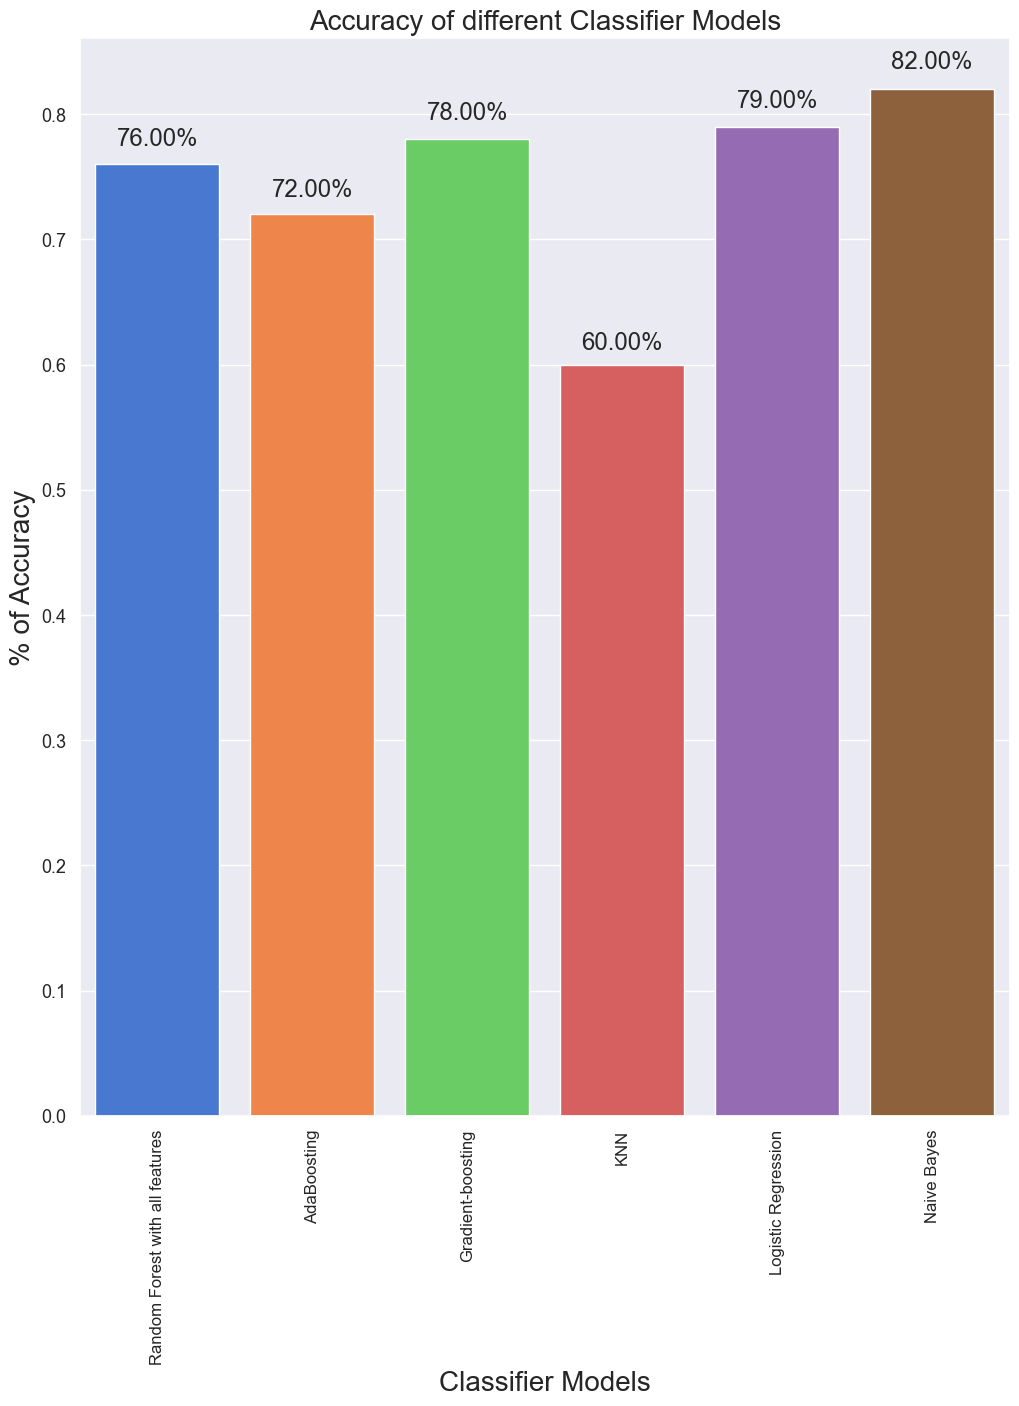

In [176]:
''' Plotting the Accuracy of different models '''

list_acc = [0.76,0.72,0.78,0.60,0.79,0.82]
list1 = ["Random Forest with all features"
         ,"AdaBoosting", 
         "Gradient-boosting", "KNN", "Logistic Regression","Naive Bayes"]
plt.rcParams['figure.figsize']=12, 14
sns.set_style("darkgrid")
ax = sns.barplot(x=list1, y=list_acc, palette = "muted", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 90)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

## Out of all the models Naive Bayes gives best accuracy i.e 0.82


## Second best model is Gradient Boosting - ensemble technique with accuracy 0.79